In [1]:
using Random: seed!
using Statistics
using Plots
using Distances
using LinearAlgebra

In [2]:
"""
x = lsgd(A, b ; mu=0, x0=zeros(size(A,2)), nIters::Int=200)
Performs gradient descent to solve the least squares problem:
``\\argmin_x 0.5 \\| b − A x \\|_2``
In:
− `A` `m × n` matrix
− `b` vector of length `m`
Option:
− `mu` step size to use, and must satisfy ``0 < mu < 2 / \\sigma_1(A)^2``
to guarantee convergence,
where ``\\sigma_1(A)`` is the first (largest) singular value.
Ch.5 will explain a default value for `mu`
− `x0` is the initial starting vector (of length `n`) to use.
Its default value is all zeros for simplicity.
− `nIters` is the number of iterations to perform (default 200)
Out:
− `x` vector of length `n` containing the approximate LS solution
"""
function lsgd(A, b, mu, x0, nIters)
    x_hat = pinv(A)*b
    x_next= zeros(size(A,2))
    x_current = x0
    x =[1:nIters;]
    y = []
    for i in 1:nIters 
        x_next = x_current - mu * A' * (A * x_current - b)
        x_current = x_next
        a = log(10, euclidean(x_current, x_hat))
        display(euclidean(x_current, x_hat))
        push!(y, a)
    end 
    return x_next, x, y
end 





lsgd

In [7]:
function lsgd(A, b ; mu::Real=0, x0=zeros(size(A,2)), nIters::Int=200)
    x_next= zeros(size(A,2))
    x_current = x0
    for i in 1:nIters 
        x_next = x_current - mu * A' * (A * x_current - b)
        x_current = x_next
    end 
    return x_next
end 

lsgd (generic function with 2 methods)

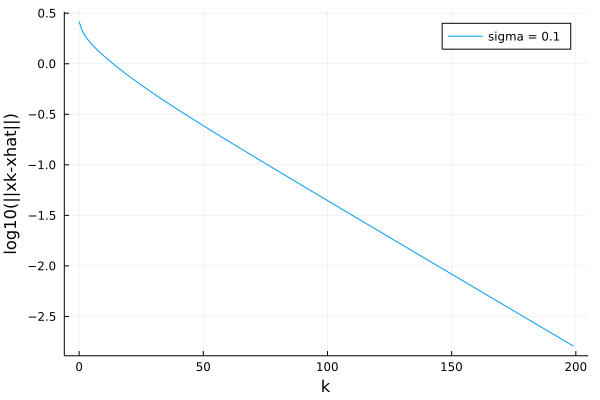

In [35]:
"""
part(b)
"""



using Random: seed!
m = 100; n = 50; sigma = 0.1
seed!(0) # seed random number generator
A = randn(m, n); xtrue = rand(n); noise = randn(m)
b = A * xtrue + sigma * noise # b and xhat change when sigma changes

_,s,_=svd(A)
sigma1=1/(s[1]^2)
#mu=sigma1
k=LinRange(0,199,200)

xhat = A \b
y1=zeros(200)
for i=1:200
    y1[i]=log10(norm(lsgd(A,b,nIters=i,mu=sigma1)-xhat ))
end

plot(xlabel = "k")
plot!(ylabel = "log10(||xk-xhat||)")
plot!(k,y1, label ="sigma = 0.1")
#plot!(k,A2*x2h,label="p2(t)")


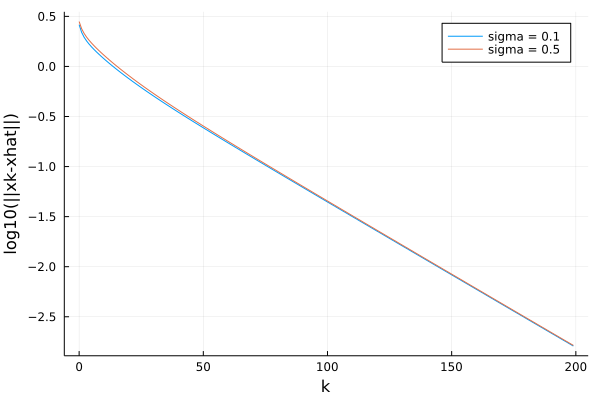

In [36]:
sigma = 0.5
b = A * xtrue + sigma * noise # b and xhat change when sigma changes
y2=zeros(200)
xhat = A \b
for i=1:200
    y2[i]=log10(norm(lsgd(A,b,nIters=i,mu=sigma1)-xhat))
end

plot!(k,y2, label ="sigma = 0.5")

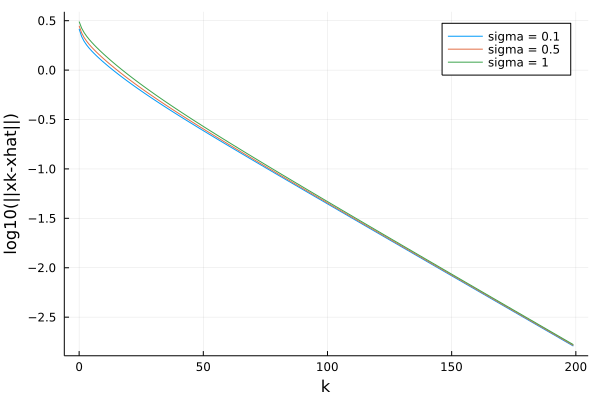

In [37]:
sigma = 1
b = A * xtrue + sigma * noise # b and xhat change when sigma changes
y3=zeros(200)
xhat = A \b
for i=1:200
    y3[i]=log10(norm(lsgd(A,b,nIters=i,mu=sigma1)-xhat))
end

plot!(k,y3, label ="sigma = 1")

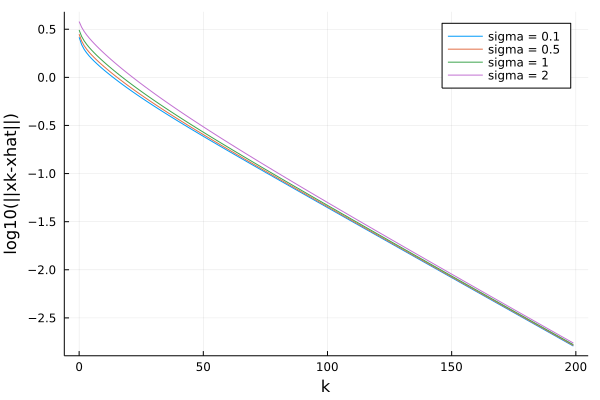

In [38]:
sigma = 2
b = A * xtrue + sigma * noise # b and xhat change when sigma changes
y4=zeros(200)
xhat = A \b
for i=1:200
    y4[i]=log10(norm(lsgd(A,b,nIters=i,mu=sigma1)-xhat))
end

plot!(k,y4, label ="sigma = 2")

In [43]:
y

125-element Vector{Any}:
  2.853564025551748
  5.2069032549073775
  7.602049069886447
 10.014954568953739
 12.437353462857882
 14.865522250315355
 17.297419757012484
 19.731788951960116
 22.16781466787137
 24.604957095587775
 27.04285535716271
 29.481266843505907
 31.92002777505612
  ⋮
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf

In [43]:
I = diagm(ones(3))

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

In [46]:
v = [ 1, 2, 3 ] 
b = [ 4 , 5, 6]

3-element Vector{Int64}:
 4
 5
 6

In [51]:
v*v'

3×3 Matrix{Int64}:
 1  2  3
 2  4  6
 3  6  9

In [54]:
a = (I - 1/13 * (v*v'))*b

3-element Vector{Float64}:
  1.5384615384615388
  0.0769230769230771
 -1.3846153846153846